<a href="https://colab.research.google.com/github/kiryu-3/prosa/blob/main/Python/Python_Stats/Stats_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2変数間の記述統計

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN

## 共分散

今回からは、**2変数**について扱っていきます。  

2つの変数$(x,y)$それぞれの偏差$(x_i-\bar{x})$と$(y_i-\bar{y})$を掛けた値の平均を  
**共分散**と呼び、通常 $S_{xy}$ で表します。

$$
S_{xy} = \frac{1}{n}\sum_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y})
$$

「2変数の相関関係を表すのに使われる指標」です。

※$n$で割るのか$n-1$で割るのかについては[こちら](https://bellcurve.jp/statistics/blog/13480.html)を参照して下さい

### 共分散行列

複数の変数間の分散と共分散を行列にしたものを**共分散行列**といいます。  

変数が多くなると行列で扱えた方が便利です。

＜例＞　変数$x,y$の場合

$$
S=\begin{bmatrix}  
s^2_{x} & s_{xy} \\  
s_{xy} & s^2_{y}  
\end{bmatrix}
$$

＜例＞　変数$X_1,X_2,…,X_n$の場合

$$
S=\begin{bmatrix}  
s_{11} & s_{12} & … & s_{1n}\\  
s_{21} & s_{22} & … & s_{2n}\\  
・ & ・ & ・ & ・\\  
s_{n1} & s_{n2} & … & s_{nn}\\  
\end{bmatrix}
$$

実際どんな感じになるのか見てみましょう。  
`todohuken_kaidata.csv`をインポートしてください。

In [ ]:
df = pd.read_csv("todohuken_kaidata.csv")
df.head(3)

,都道府県,地方,15歳以上の平均睡眠時間（男）,15歳以上の平均睡眠時間（女）,運転免許保有者割合（%）,農業従事者（人口100人あたり）,平均通勤時間（片道）,自動車保有台数（人口100人あたり）,鉄道旅客輸送量(人口一人あたり)
0,北海道,北海道地方,473,465,63.4,1.79,20.2,68.67,65.90
1,青森県,東北地方,486,470,66.4,4.95,20.2,77.65,13.10
2,岩手県,東北地方,477,469,67.6,5.50,20.0,80.55,20.86


ここでは「15歳以上の男性の平均睡眠時間」と「農業従事者」の  
共分散行列を求めてみましょう。

In [ ]:
male_sleep = df["15歳以上の平均睡眠時間（男）"]
nogyo_number = df["農業従事者（人口100人あたり）"]

np.cov(male_sleep , nogyo_number , bias=True)

array([[60.98325034,  8.94002716],
       [ 8.94002716,  1.93853463]])

3種類のカラムを指定することもできます。  
「15歳以上の女性の平均睡眠時間」も追加します。

In [ ]:
female_sleep = df["15歳以上の平均睡眠時間（女）"]

x = np.stack([male_sleep , female_sleep , nogyo_number] , axis=0)
np.cov(x , bias=True)

array([[60.98325034, 46.47351743,  8.94002716],
       [46.47351743, 51.93843368,  7.52096876],
       [ 8.94002716,  7.52096876,  1.93853463]])

＜データの解釈方法＞  

①男性の平均睡眠時間の分散：$60.9$   
②女性の平均睡眠時間の分散：$51.9$  
③農業従事者の分散：$1.93$  
④男性と女性の平均睡眠時間の共分散：$46.4$  
⑤平均睡眠時間(男)と農業従事者の共分散：$8.94$  
⑥平均睡眠時間(女)と農業従事者の共分散：$7.52$

共分散は実際は**相関係数**を求めるために必要になります。  
ここまでは一つのステップです。

## 相関係数

共分散を標準化したものが**相関係数**です。  
標準化して初めて、値の比較をすることができます。

共分散のとりうる値を、$-1～1$の範囲にしたものになります。

$$
-1 ≦ \frac{S_{xy}}{S_xS_y} ≦ 1
$$

### 正の相関と負の相関

ある値が大きいほどもう片方の値も大きい傾向にあるものは**正の相関**、  
逆にある値が大きいほどもう片方の値は小さい傾向にあるものは**負の相関**と呼ばれます。  

正の相関では相関係数は**正**、負の相関では相関係数は**負**になります。

ある値の大小ともう片方の値の大小が関係ないものは**無相関**と呼ばれます。  

無相関では相関係数は **$0$** になります。

### 相関行列

複数の変数間の相関係数を行列にしたものを**相関行列**といいます。   

対角要素は必ず **$1$** になります。

＜例＞　変数$X_1,X_2,…,X_n$の場合

$$
R=\begin{bmatrix}  
1 & r_{12} & … & r_{1n}\\  
r_{21} & 1 & … & r_{2n}\\  
・ & ・ & ・ & ・\\  
r_{n1} & r_{n2} & … & 1\\  
\end{bmatrix}
$$

ここでは「15歳以上の男性の平均睡眠時間」と「農業従事者」の  
相関行列を求めてみましょう。

In [ ]:
male_sleep = df["15歳以上の平均睡眠時間（男）"]
nogyo_number = df["農業従事者（人口100人あたり）"]

np.corrcoef(male_sleep , nogyo_number)

array([[1.        , 0.82223654],
       [0.82223654, 1.        ]])

3種類のカラムを指定することもできます。  
「15歳以上の女性の平均睡眠時間」も追加します。

In [ ]:
female_sleep = df["15歳以上の平均睡眠時間（女）"]

x = np.stack([male_sleep , female_sleep , nogyo_number] , axis=0)
np.corrcoef(x)

array([[1.        , 0.82576379, 0.82223654],
       [0.82576379, 1.        , 0.74953614],
       [0.82223654, 0.74953614, 1.        ]])

＜データの解釈方法＞  

①男性と女性の平均睡眠時間の相関係数：$0.825$  
②平均睡眠時間(男)と農業従事者の相関係数：$0.822$  
③平均睡眠時間(女)と農業従事者の相関係数：$0.749$

この値が実際高いのかどうかについては次項で述べます。

**`df.corr()`**とすると、簡単に相関行列を求められます。

In [ ]:
df.corr()

,15歳以上の平均睡眠時間（男）,15歳以上の平均睡眠時間（女）,運転免許保有者割合（%）,農業従事者（人口100人あたり）,平均通勤時間（片道）,自動車保有台数（人口100人あたり）,鉄道旅客輸送量(人口一人あたり)
15歳以上の平均睡眠時間（男）,1.000000,0.825764,0.400987,0.822237,-0.781084,0.610426,-0.595017
15歳以上の平均睡眠時間（女）,0.825764,1.000000,0.246533,0.749536,-0.554681,0.433637,-0.338663
運転免許保有者割合（%）,0.400987,0.246533,1.000000,0.576308,-0.635377,0.925849,-0.751471
農業従事者（人口100人あたり）,0.822237,0.749536,0.576308,1.000000,-0.696542,0.719500,-0.629990
平均通勤時間（片道）,-0.781084,-0.554681,-0.635377,-0.696542,1.000000,-0.826087,0.786965
自動車保有台数（人口100人あたり）,0.610426,0.433637,0.925849,0.719500,-0.826087,1.000000,-0.872011
鉄道旅客輸送量(人口一人あたり),-0.595017,-0.338663,-0.751471,-0.629990,0.786965,-0.872011,1.000000


＜データの解釈方法＞  

①平均睡眠時間(男)と通勤時間の相関係数：$-0.781$  
②運転免許保有者割合と自動車保有台数の相関係数：$0.925$  
③運転免許保有者割合と鉄道旅客輸送量の相関係数：$-0.751$

### 相関行列の描画

ヒートマップを使って相関行列を描画しましょう。

まずは睡眠時間と農業従事者数・通勤時間の関係について確認します。  

ここで睡眠時間は男性のもののみに絞ります。

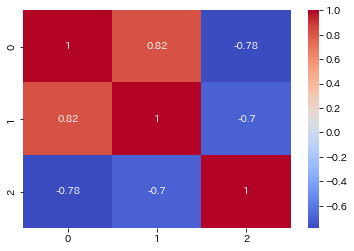

In [ ]:
male_sleep = df["15歳以上の平均睡眠時間（男）"]
nogyo_number = df["農業従事者（人口100人あたり）"]
tukin_time = df["平均通勤時間（片道）"]

z = np.corrcoef([male_sleep , nogyo_number , tukin_time])
sns.heatmap(z,cmap="coolwarm",annot=True)

睡眠時間と農業従事者数の間の**正の相関**、  
睡眠時間と通勤時間の間の**負の相関**について確認できます。

まずは免許取得率と自動車保有台数・鉄道旅客輸送量の関係について確認します。  

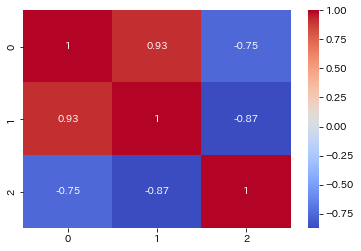

In [ ]:
menkyo_per = df["運転免許保有者割合（%）"]
car_number = df["自動車保有台数（人口100人あたり）"]
train_carry = df["鉄道旅客輸送量(人口一人あたり)"]

z = np.corrcoef([menkyo_per , car_number , train_carry])
sns.heatmap(z,cmap="coolwarm",annot=True)

免許取得率と自動車保有台数の間の**正の相関**、  
免許取得率と鉄道旅客輸送量の間の**負の相関**について確認できます。

### 相関係数のポイント

#### 相関の強弱

相関の強さには、明確な基準はありません。  
しかし、一般的な基準値は存在するようです。

![リンクテキスト](https://imgur.com/W9k2Uwy.png)

この基準値より、以下のようなことがいえます。

睡眠時間と農業従事者数の間には**強い正の相関**、  
睡眠時間と通勤時間の間には**強い負の相関**がはたらいていると分かります。

免許取得率と自動車保有台数の間には**強い正の相関**、  
免許取得率と鉄道旅客輸送量の間には**強い負の相関**がはたらいていると分かります。

#### 散布図

変数間の相関を見る場合には必ず**散布図**を見るようにしましょう。  

外れ値・異常値などが確認できます。

まずは「15歳以上の男性の平均睡眠時間」と「農業従事者」の  
相関関係について散布図を見てみましょう。

Text(0, 0.5, '農業従事者数')

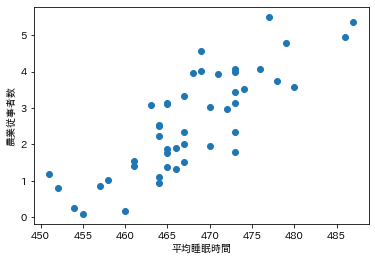

In [ ]:
sleep_time = df["15歳以上の平均睡眠時間（男）"]
nogyo_number = df["農業従事者（人口100人あたり）"]

plt.scatter(sleep_time,nogyo_number)
plt.xlabel("平均睡眠時間")
plt.ylabel("農業従事者数")

**強い正の相関**が確認できます。

続いて「15歳以上の男性の平均睡眠時間」と「平均通勤時間」の  
相関関係について散布図を見てみましょう。

Text(0, 0.5, '平均通勤時間')

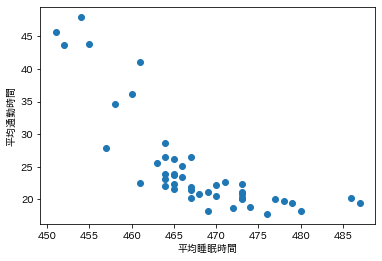

In [ ]:
sleep_time = df["15歳以上の平均睡眠時間（男）"]
tukin_number = df["平均通勤時間（片道）"]

plt.scatter(sleep_time,tukin_number)
plt.xlabel("平均睡眠時間")
plt.ylabel("平均通勤時間")

**強い負の相関**が確認できます。

#### 相関関係と因果関係

「相関関係」は、2つの事象の間にある何らかの関係のことです。  
しかし、どちらかの事象がもう片方の事象の直接的な原因かどうかは不明です。

「因果関係」は、2つの事象のうち一方が原因となって他方の結果があるという関係のことです。

誤解しないようにしましょう。

## 連関

これまでは、連続変数間の相関関係について見てきました。  
ここでは、カテゴリー変数間の相関関係について見ていきます。

※連続変数・カテゴリー変数については[こちら](https://bit.ly/3I0b3Eo)に詳しく書かれています

2つのカテゴリー変数間に相互関係が存在するとき、   
2つの変数間には「**連関**がある」という言い方をします。  

（相互関係が存在しないとき、「**独立**している」という言い方をします）

### クロス集計表

カテゴリー変数のそれぞれの組み合わせの集計値（**度数**という）を表にしたものを、  
**分割表**や**クロス集計表**といいます。  
英語では **contingency table**（コンフィデンシー）といいます。

では実際にPythonを使ってクロス集計表を作ってみましょう。  
ここでは[こちら](https://bit.ly/3XrYN5r)を例として扱います。（説明用に一部データを変更しています）

In [ ]:
# dataframeの作成（実データ）
data = {
    "sport":["野球","野球","サッカー","サッカー","野球","サッカー","サッカー","テニス","サッカー","水泳",
             "テニス","野球","野球","サッカー","サッカー","水泳","野球","テニス","テニス","サッカー",
             "サッカー","水泳","サッカー","水泳","野球","テニス","サッカー","野球","サッカー","テニス"],
    "sex":["男子","男子","男子","男子","男子","男子","男子","男子","男子","男子",
           "男子","男子","男子","男子","男子","女子","女子","女子","女子","女子",
           "女子","女子","女子","女子","女子","女子","女子","女子","女子","女子",],
}

df = pd.DataFrame(data)
df.head(3)

,sport,sex
0,野球,男子
1,野球,男子
2,サッカー,男子


In [ ]:
# クロス集計表の作成
cont_table = pd.crosstab(df["sex"],df["sport"])
cont_table

sport,サッカー,テニス,水泳,野球
sex,,,,
女子,5,4,3,3
男子,7,2,1,5


実際に観測された度数を**観測度数**といいます。  
上のクロス集計表は**観測度数**のクロス集計表です。

In [ ]:
# dataframeの作成（説明用データ）
data = {
    "sport":["野球","野球","野球","野球","サッカー","サッカー","サッカー","サッカー","サッカー","サッカー",
             "テニス","テニス","テニス","水泳","水泳","野球","野球","野球","野球","サッカー",
             "サッカー","サッカー","サッカー","サッカー","サッカー", "テニス","テニス","テニス","水泳","水泳"],
    "sex":["男子","男子","男子","男子","男子","男子","男子","男子","男子","男子",
           "男子","男子","男子","男子","男子","女子","女子","女子","女子","女子",
           "女子","女子","女子","女子","女子","女子","女子","女子","女子","女子",],
}

df_test = pd.DataFrame(data)
df_test.head(3)

,sport,sex
0,野球,男子
1,野球,男子
2,野球,男子


In [ ]:
# クロス集計表の作成
cont_testtable = pd.crosstab(df_test["sex"],df_test["sport"])
cont_testtable

sport,サッカー,テニス,水泳,野球
sex,,,,
女子,6,3,2,4
男子,6,3,2,4


それぞれの変数が独立であると想定した場合に期待される度数を**期待度数**といいます。  
上のクロス集計表は**期待度数**のクロス集計表です。

### カイ二乗値

連関の強さを見るためには、観測度数が期待度数からどのくらい離れているかを見ます。

観測度数が期待度数からどれくらい離れているかを計算した値を**カイ二乗値**（**$\chi^2$**）といいます。

※$a$行$b$列のクロス集計表における$i$行$j$列の観測度数を$n_{ij}$、期待度数を$e_{ij}$とする。

$$
\chi^2 = \sum_{i=1}^{a}\sum_{j=1}^{b} \frac{(n_{ij}-e_{ij})^2}{e_{ij}})
$$

実際にPythonを使ってカイ二乗値を求めてみましょう。

In [ ]:
cont_table = pd.crosstab(df["sex"],df["sport"])
stats.chi2_contingency(cont_table , correction=False)

(2.5, 0.4752910833430205, 3, array([[6., 3., 2., 4.],
        [6., 3., 2., 4.]]))

第一戻り値が**カイ二乗値**、第四戻り値が**期待度数**になります。

カイ二乗値が$2.5$であると算出することができました。

### クラメールの連関係数

カイ二乗値は共分散と同じく標準化された値ではないので、  
これを標準化する必要があります。

カイ二乗値を$0～1$に標準化した値を**クラメールの連関係数**といいます。  
連関の強さを表す指標として最も使われます。

※$min(a,b)$は行数$a$と列数$b$の小さい方

$$
V = \sqrt\frac{\chi^2}{(min(a,b)-1)N}
$$

統計学上はクラメールの連関係数よりもカイ二乗値の方が重要(？)なので、  
計算は省略します。